In [1]:
import open3d as o3d
import os



raw_dir = '../../dataset/Thingi10K/raw_meshes/'
graph_dir = '../../dataset/Thingi10K/graphs/'


TARGET_SIZE = 5000


def raw_data_file_path(id: int) -> str:
    return f'{raw_dir}{id}'


def all_raw_files():
    return [f for f in os.listdir(raw_dir) if f.endswith(".stl")]


def get_mesh(file_path):
    return o3d.io.read_triangle_mesh(file_path)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
from tqdm import tqdm
import random

def data_loader(mesh_count: int | None = None):
    stl_files = all_raw_files()
    if mesh_count == None:
        mesh_count = len(stl_files)
    else:
        random.shuffle(stl_files)

    meshes = []

    for i in tqdm(range(mesh_count), desc="Processing STL Files"):
        file_path = os.path.join(raw_dir, stl_files[i])
        try:
            meshes.append(get_mesh(file_path))
        except Exception as inst:
            print('Error with ', file_path)
            print(inst)
    
    return meshes

mesh_data = data_loader(None)


Processing STL Files:   0%|          | 0/9956 [00:00<?, ?it/s]

Processing STL Files:  43%|████▎     | 4296/9956 [04:57<07:08, 13.20it/s]  

[Open3D WARNING] Unable to load file ../../dataset/Thingi10K/raw_meshes/74463.stl with ASSIMP


Processing STL Files:  45%|████▌     | 4487/9956 [05:15<03:52, 23.49it/s]  

[Open3D WARNING] Unable to load file ../../dataset/Thingi10K/raw_meshes/49911.stl with ASSIMP


Processing STL Files:  48%|████▊     | 4733/9956 [05:37<02:05, 41.50it/s]

[Open3D WARNING] Unable to load file ../../dataset/Thingi10K/raw_meshes/286163.stl with ASSIMP


Processing STL Files:  80%|████████  | 7970/9956 [09:26<01:21, 24.31it/s]

[Open3D WARNING] Unable to load file ../../dataset/Thingi10K/raw_meshes/77942.stl with ASSIMP


Processing STL Files:  91%|█████████ | 9023/9956 [11:03<01:13, 12.68it/s]

In [55]:
print(mesh_data[0].vertices)

std::vector<Eigen::Vector3d> with 2492 elements.
Use numpy.asarray() to access data.


In [3]:
import numpy as np
import copy


def random_index():
    return np.random.randint(0, len(mesh_data))


def random_mesh(print_info = True):
    ri = random_index()
    if print_info:
        print('Mesh index =', ri)
        print(mesh_data[ri])
    return copy.deepcopy(mesh_data[ri])

In [86]:
mesh = random_mesh()
# mesh = mesh_data[251]

Mesh index = 96
TriangleMesh with 386 points and 212 triangles.


In [109]:
import converters

voxel = converters.mesh_to_voxel(mesh, min(mesh.get_max_bound()) / 10)
graph = converters.mesh_to_graph(mesh)

Data(x=[2261, 3], edge_index=[2, 4704], norm=[2261, 3])


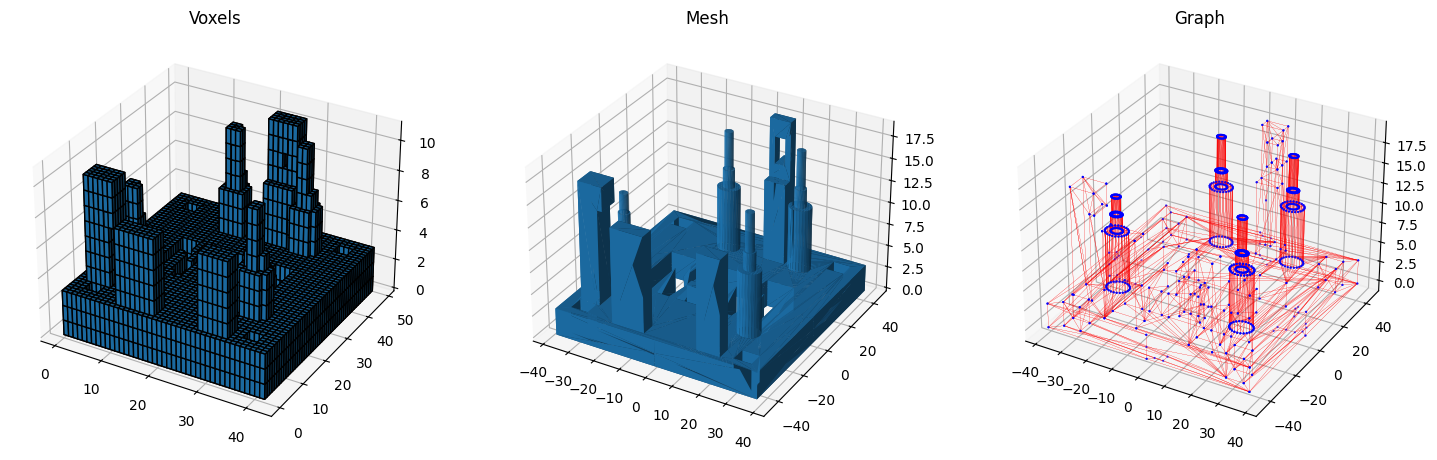

In [121]:
import visualization

visualization.draw_voxels_mesh(voxel, mesh, graph, 'thingi_mesh_18.png')

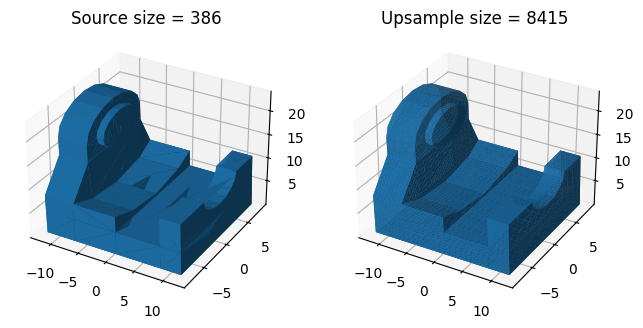

In [89]:
import augmentation
import visualization

from importlib import reload
reload(augmentation)
reload(visualization)


upsample_mesh = augmentation.upsample_mesh(mesh, 3)
# smooth_taubin = augmentation.smooth_mesh_taubin(mesh, 2, 0.05, -0.17)


visualization.plot_meshes([mesh, upsample_mesh],
    [f'Source size = {np.asarray(mesh.vertices).shape[0]}',
     f'Upsample size = {np.asarray(upsample_mesh.vertices).shape[0]}'],
     'augment_srn.png')

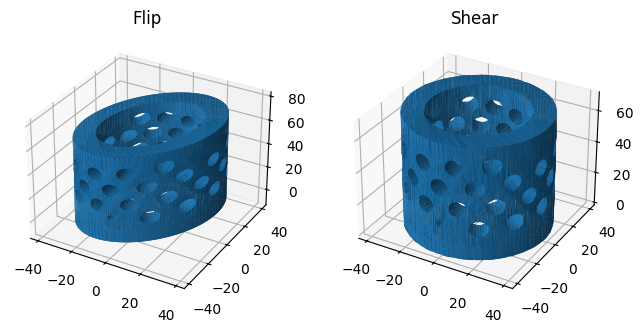

In [35]:
from importlib import reload
reload(augmentation)

flipped_mesh = augmentation.smooth_mesh_taubin(mesh, 1)
sheared_mesh = augmentation.shear_mesh(mesh, 0.3, 'z')
jittered_mesh = augmentation.jitter_mesh(mesh, 0.1, 0.5)

visualization.plot_meshes([sheared_mesh, jittered_mesh],
                          ['Flip', 'Shear', 'Jitter'], 'augment_fs')

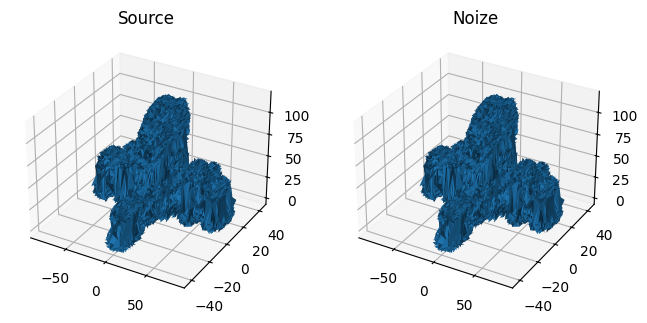

In [171]:
noize_mesh = augmentation.add_random_noise_to_vertices(mesh, 5)

visualization.plot_meshes([mesh, noize_mesh],
                          ['Source', 'Noize'])

In [129]:
def save_loop(i):
    mesh = random_mesh()
    voxel = converters.mesh_to_voxel(mesh, min(mesh.get_max_bound()) / 10)
    graph = converters.mesh_to_graph(mesh)
    visualization.draw_voxels_mesh(voxel, mesh, graph, f'thingi_mesh_{i}.png')

Mesh index = 226
TriangleMesh with 2588 points and 2056 triangles.
Data(x=[2588, 3], edge_index=[2, 6168], norm=[2588, 3])


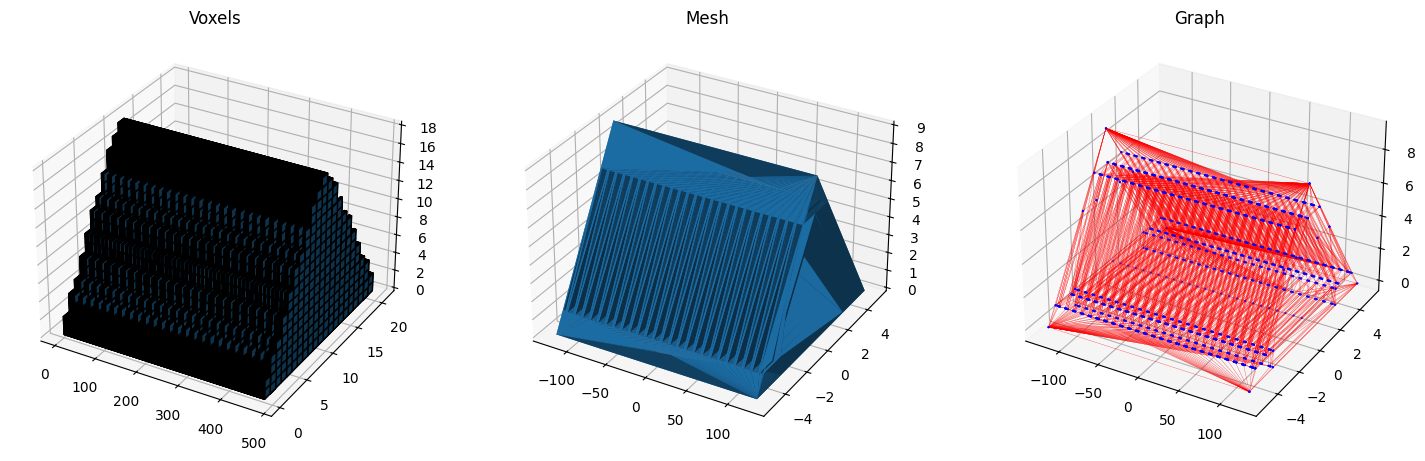

In [130]:
try:
    save_loop(1)
except Exception as e:
    print('error', e)

Mesh index = 164
TriangleMesh with 1094 points and 584 triangles.
Data(x=[1094, 3], edge_index=[2, 1752], norm=[1094, 3])


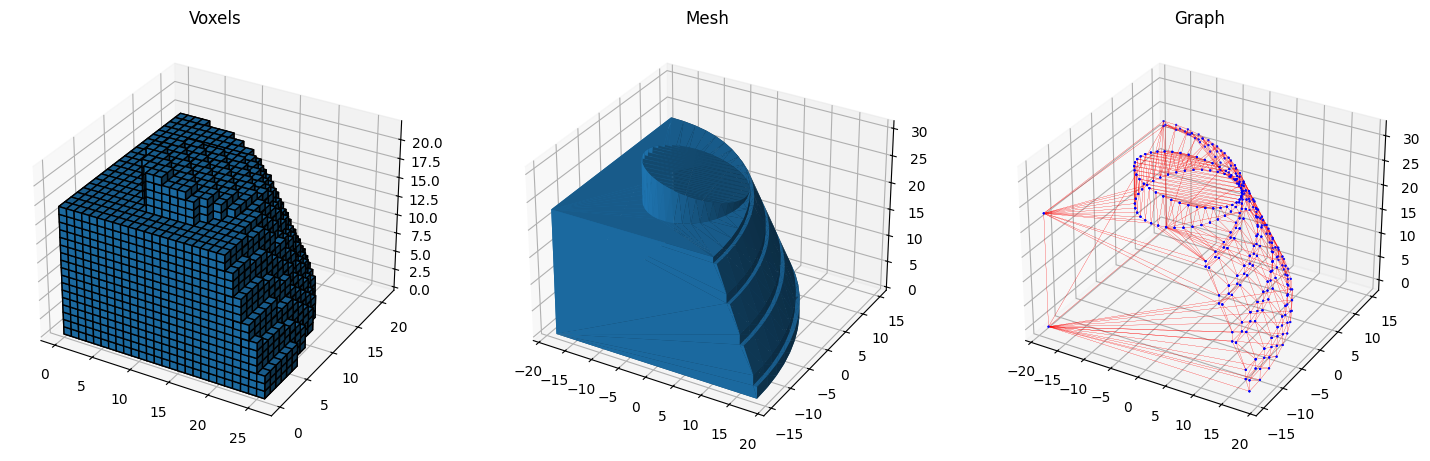

In [132]:
try:
    save_loop(2)
except Exception as e:
    print('error', e)

Mesh index = 356
TriangleMesh with 354946 points and 185988 triangles.
Data(x=[354946, 3], edge_index=[2, 557964], norm=[354946, 3])


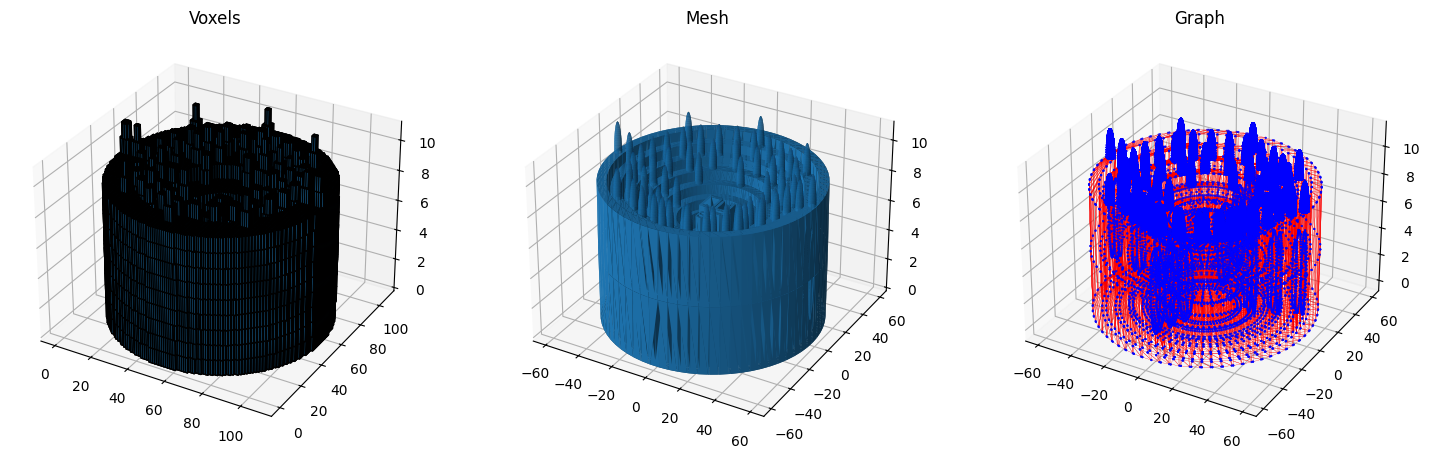

In [131]:
try:
    save_loop(3)
except Exception as e:
    print('error', e)

Mesh index = 107
TriangleMesh with 96 points and 60 triangles.
Data(x=[96, 3], edge_index=[2, 180], norm=[96, 3])


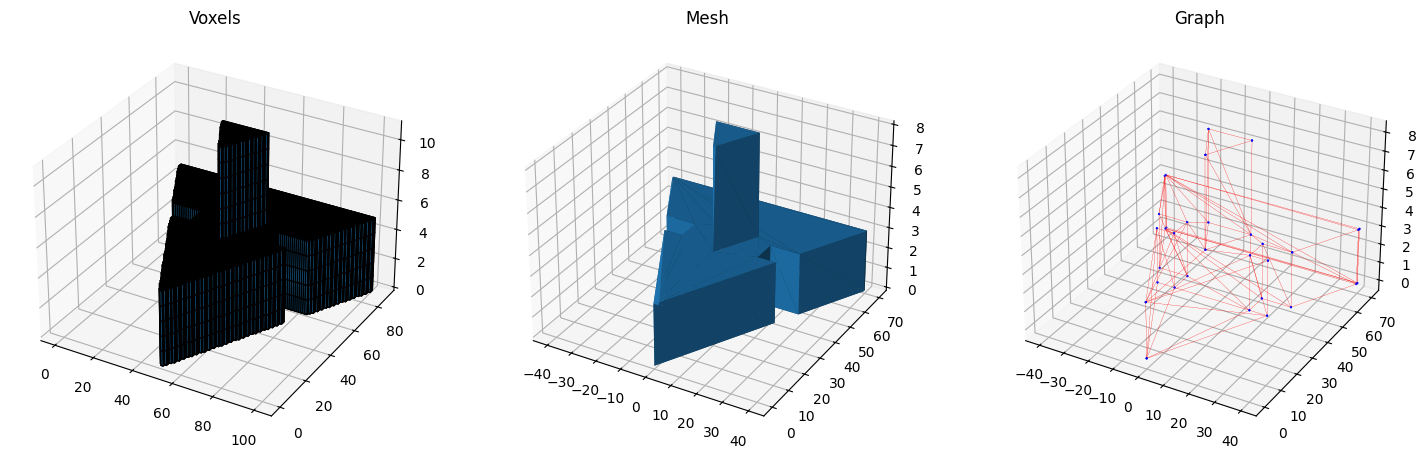

In [133]:
try:
    save_loop(4)
except Exception as e:
    print('error', e)

Mesh index = 291
TriangleMesh with 28497 points and 12094 triangles.
Data(x=[28497, 3], edge_index=[2, 36282], norm=[28497, 3])


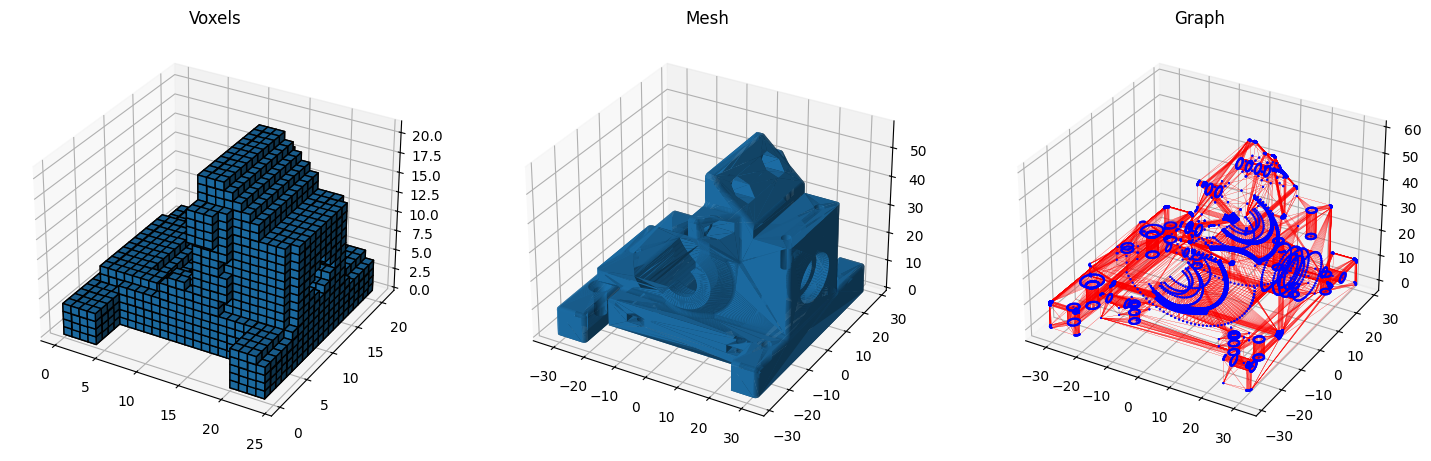

In [134]:
try:
    save_loop(5)
except Exception as e:
    print('error', e)

Mesh index = 8
TriangleMesh with 16257 points and 8348 triangles.
Data(x=[16257, 3], edge_index=[2, 25044], norm=[16257, 3])


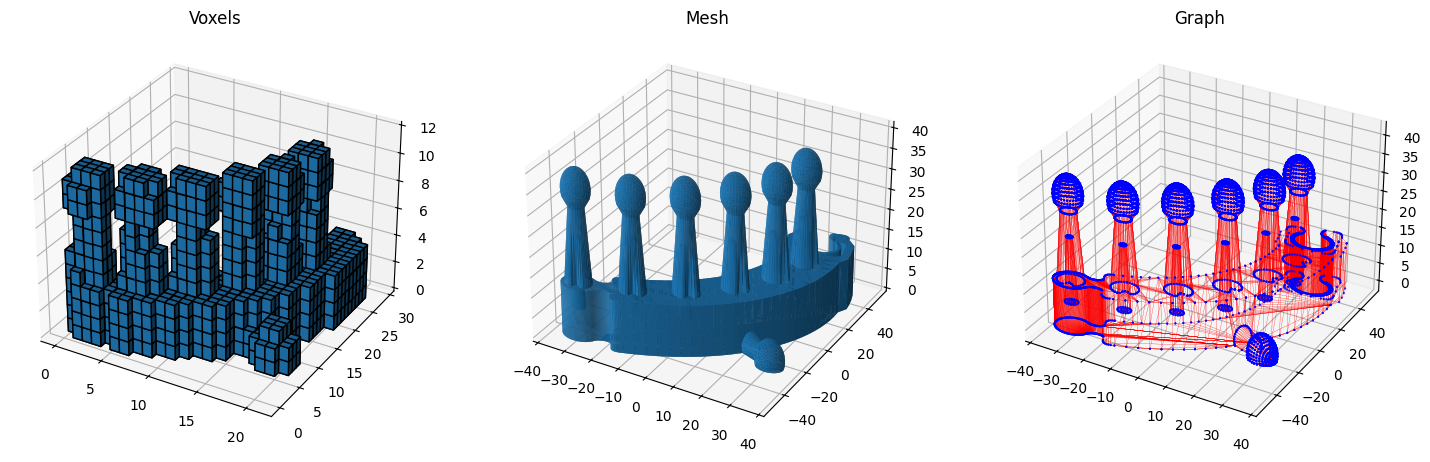

In [135]:
try:
    save_loop(6)
except Exception as e:
    print('error', e)

Mesh index = 199
TriangleMesh with 1140 points and 420 triangles.
Data(x=[1140, 3], edge_index=[2, 1260], norm=[1140, 3])


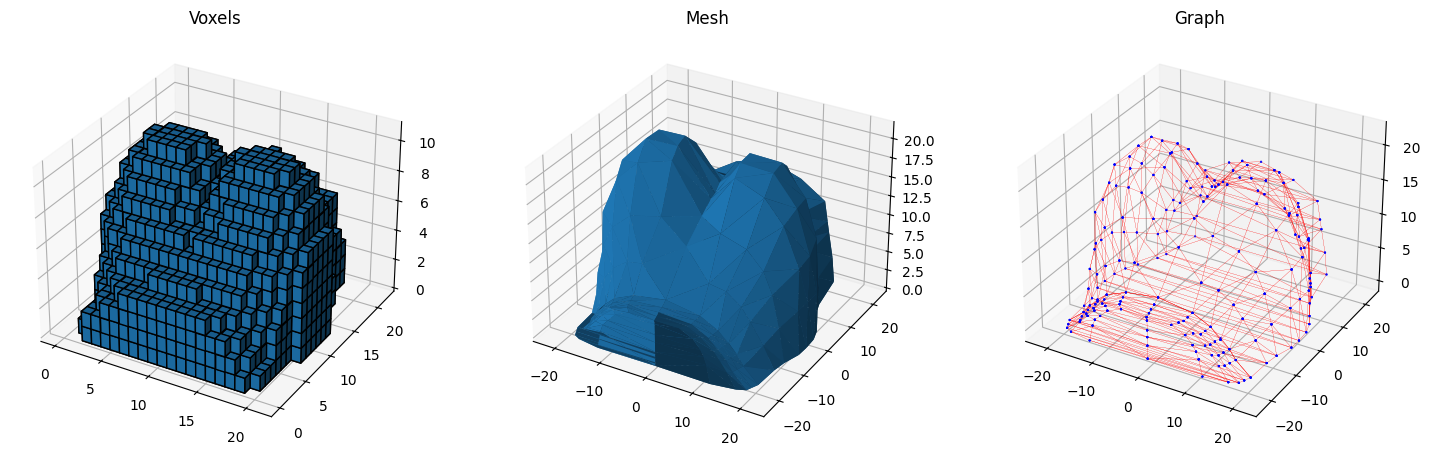

In [136]:
try:
    save_loop(7)
except Exception as e:
    print('error', e)

Mesh index = 311
TriangleMesh with 27004 points and 18080 triangles.
Data(x=[27004, 3], edge_index=[2, 54240], norm=[27004, 3])


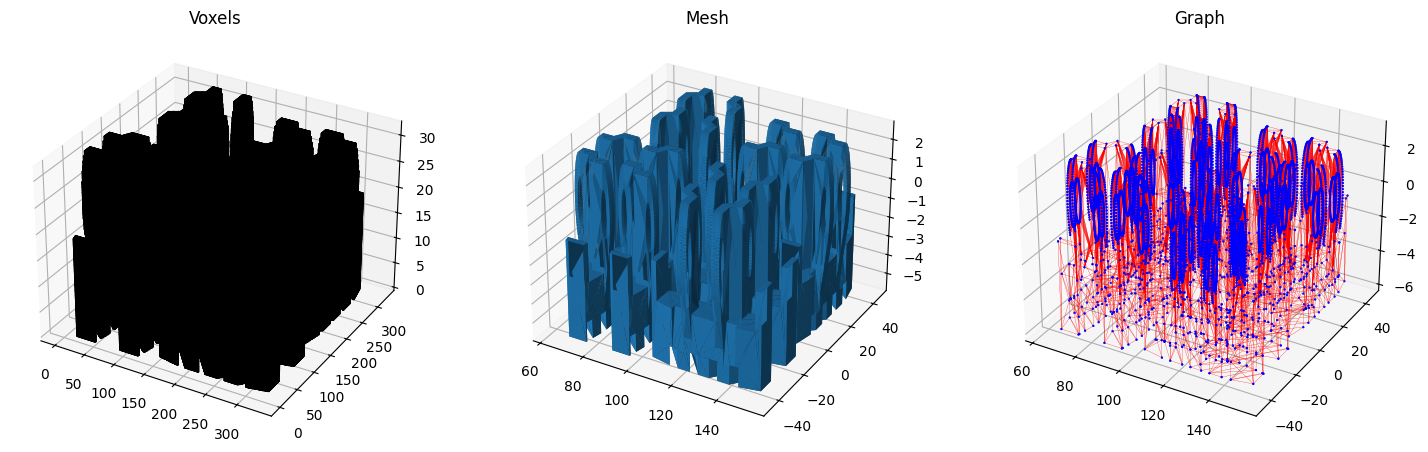

In [137]:
try:
    save_loop(8)
    
except Exception as e:
    print('error', e)

Mesh index = 363
TriangleMesh with 1191 points and 716 triangles.
Data(x=[1191, 3], edge_index=[2, 2148], norm=[1191, 3])


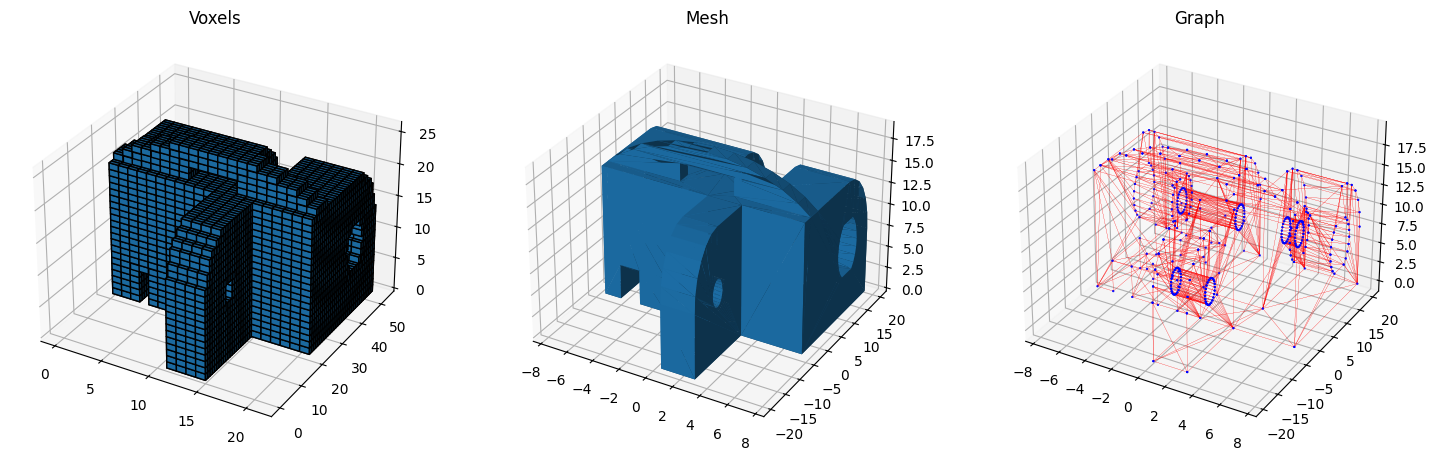

In [138]:
try:
    save_loop(9)
except Exception as e:
    print('error', e)

Mesh index = 140
TriangleMesh with 144 points and 80 triangles.
Data(x=[144, 3], edge_index=[2, 240], norm=[144, 3])


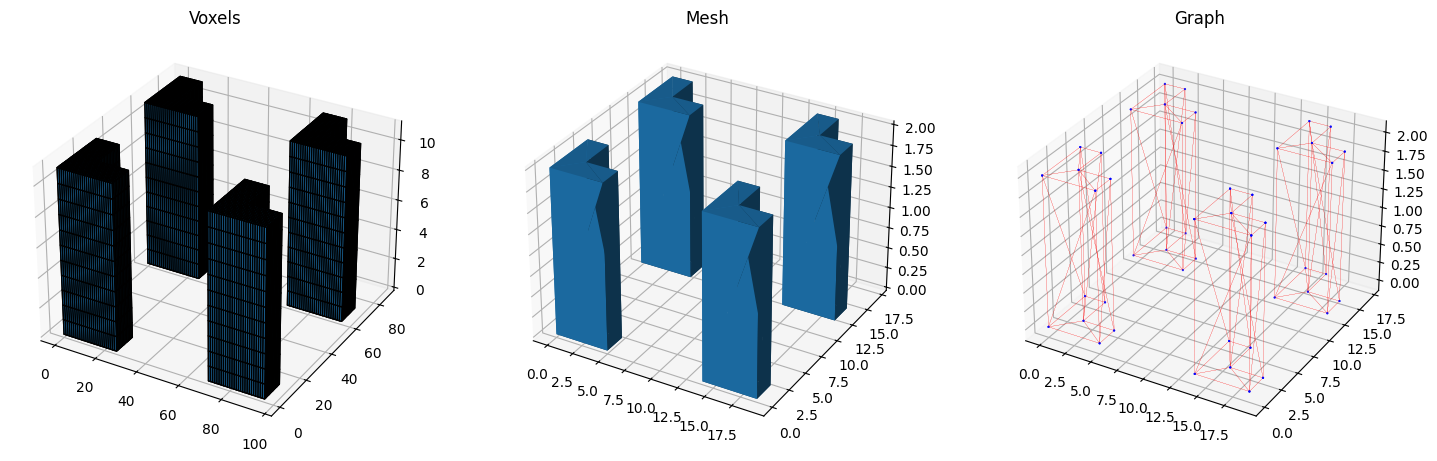

In [139]:
try:
    save_loop(10)
except Exception as e:
    print('error', e)